# Введение в Azure Notebooks

[Azure Notebooks](http://notebooks.azure.com) - это облачная реализация технологии [Jupyter Notebook](http://jupyter.org/) в облаке Microsoft Azure.

Notebooks удобно использовать, когда вам нужно комбинировать текст и программный код:

  * [Вычислительная журналистика](https://en.wikipedia.org/wiki/Data-driven_journalism)
  * Преподавание компьютерных дисциплин
  * и др.
 
 
 Azure Notebooks поддерживают следующие языки программирования:
 
  * Python (2,3)
  * F#
  * R
 
 
 Для разметки текста используется Markdown с вкраплениями $\LaTeX$
  

## Небольшое введение в numpy

In [1]:
import numpy as np

x = np.arange(25)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [2]:
x = x.reshape(5,5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [3]:
x = x.astype(np.float32)
x

array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.],
       [ 15.,  16.,  17.,  18.,  19.],
       [ 20.,  21.,  22.,  23.,  24.]], dtype=float32)

Все операции (*,+,np.sin) выполняются по-элементно

In [4]:
np.hstack([x*np.eye(5,5), x+np.eye(5,5)])

array([[  0.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   3.,   4.],
       [  0.,   6.,   0.,   0.,   0.,   5.,   7.,   7.,   8.,   9.],
       [  0.,   0.,  12.,   0.,   0.,  10.,  11.,  13.,  13.,  14.],
       [  0.,   0.,   0.,  18.,   0.,  15.,  16.,  17.,  19.,  19.],
       [  0.,   0.,   0.,   0.,  24.,  20.,  21.,  22.,  23.,  25.]])

## Отображение графиков

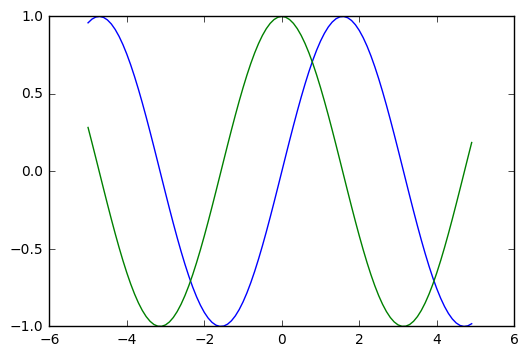

In [5]:
import pylab
x=(np.arange(100)-50)/10
pylab.plot(x,np.sin(x))
pylab.plot(x,np.cos(x))
pylab.show()

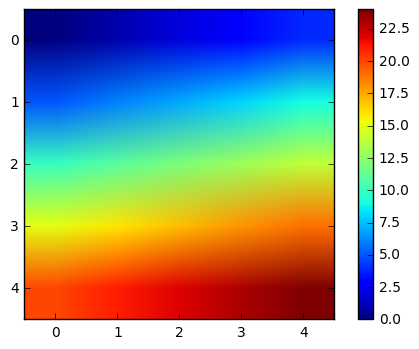

In [6]:
grad = np.arange(25,dtype=np.float32).reshape(5,5)
pylab.imshow(grad)
pylab.colorbar()
pylab.show()

## Работа с файлами и сетью

Доступ к внешним сетевым ресурсам в Azure Notebooks ограничен:

 * Сервера Microsoft Azure (Storage, ...)
 * Github
 
При этом доступно локальное (ограниченное по объему) хранилище файлов, с которым можно работать.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7578  100  7578    0     0   119k      0 --:--:-- --:--:-- --:--:--  119k


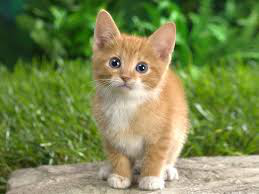

In [10]:
import os
if not os.path.exists("kitten.jpg"):
    #!wget https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/kitten.jpg
    !curl -O https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/kitten.jpg

import PIL
img = PIL.Image.open('kitten.jpg')
img

## Работа с изображениями

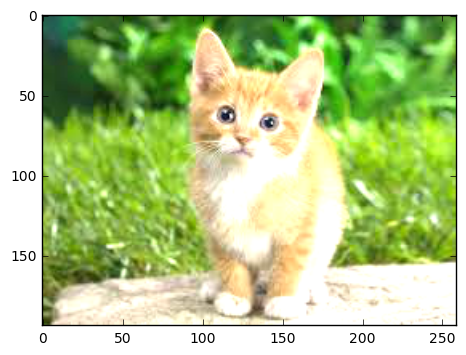

In [11]:
pixels = np.array(img)
pixels = pixels.astype(np.float32)/256.0
pylab.imshow(np.minimum(1.0,pixels*1.5))
pylab.show()

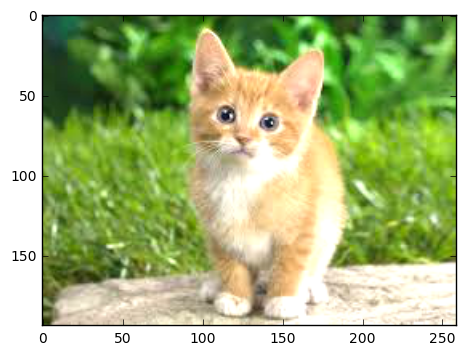

In [12]:
from ipywidgets import interact
import ipywidgets as widgets

def show(lum):
    pylab.imshow(np.minimum(1.0,pixels*lum))
    pylab.show()
    
interact(show, lum=(0.5,2.0))

## Когнитивные сервисы

In [14]:
import requests
import json

def analyze_image(image_url, api_key):
    url = "https://westcentralus.api.cognitive.microsoft.com/vision/v1.0/analyze?visualFeatures=Tags,Description"
    headers = {"Content-Type": "application/json", "Ocp-Apim-Subscription-Key": api_key}
    body = "{{'url': '{}'}}".format(image_url)
    r = requests.post(url, headers=headers, data=body)
    result = json.loads(r.text)
    return result

res = analyze_image('https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/images/kitten.jpg','c928568db44d45b788a79f0b88c06240')
print (res)

{'description': {'tags': ['grass', 'outdoor', 'sitting', 'animal', 'mammal', 'cat', 'orange', 'top', 'small', 'little', 'standing', 'brown', 'green', 'white', 'black', 'laying', 'red', 'field'], 'captions': [{'text': 'a cat sitting on the grass', 'confidence': 0.8941804693215117}]}, 'metadata': {'width': 259, 'height': 194, 'format': 'Jpeg'}, 'tags': [{'confidence': 0.998615026473999, 'name': 'grass'}, {'confidence': 0.9983652234077454, 'name': 'outdoor'}, {'confidence': 0.9879385828971863, 'name': 'ground'}, {'confidence': 0.9763855934143066, 'name': 'sitting'}, {'confidence': 0.971914529800415, 'name': 'animal'}, {'hint': 'animal', 'confidence': 0.961734414100647, 'name': 'mammal'}, {'confidence': 0.633335530757904, 'name': 'orange'}, {'confidence': 0.6068316698074341, 'name': 'domestic cat'}, {'confidence': 0.3584533631801605, 'name': 'cat'}], 'requestId': 'f906d231-1484-418f-a752-55fbab981de2'}


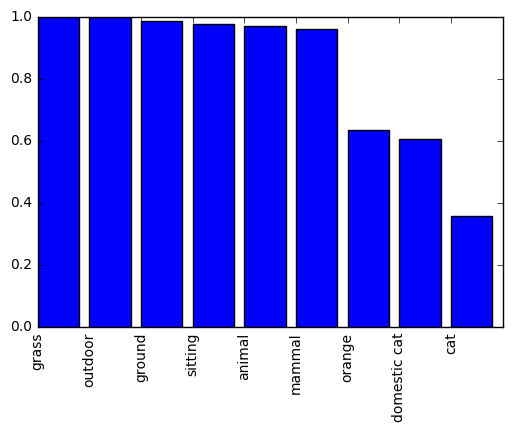

In [15]:
def slice(kw,arr):
    return [x[kw] for x in arr]
pylab.bar(range(len(res['tags'])),slice('confidence',res['tags']))
pylab.xticks(range(len(res['tags'])),slice('name',res['tags']),rotation='vertical')
pylab.show()

In [16]:
print(res['description']['captions'][0]['text'])

a cat sitting on the grass
